## 제목 : 구글 스콜라를 이용한  '탄소', '중립', '기후' 관련 최신 연구동향 시각화

기후기술이란 탄소중립 달성을 위해 온실가스를 감축하고 기후변화에 적응하기 위한 기술을 말합니다. 본 노트에서는 'Carbon', 'Neutral', 'Climate'를 키워드로 하는 연구 논문들을 구글 스콜라(Google Scholar)에서 수집한 후 연도별 논문 제목의 키워드 변화를 시각화 해보았습니다. 재미있게 봐주세요 :)

## Step1 : 구글 코랩을 이용한 시각화 준비 작업

저는 노트북 사양이 좋지 않아^^; 데이터 분석 환경으로 구글 코랩을 주로 사용합니다. 구글 코랩은 최대 12시간까지 GPU를 제공해서 간단한 딥러닝 모형을 돌릴 때도 사용하는데요, 코랩 환경의 스토리지로 구글 드라이브를 마운트할 수 있습니다. 

아래의 코드는 구글 드라이브를 코랩에 마운트 하는 코드입니다. 코랩환경은 가상머신 환경이기 때문에 초기화될 경우 그동안 작업한 결과물이 모두 사라지게 되는데요, 이렇게 구글 드라이브를 마운트 하면, 코랩환경에서 구글 드라이브의 파일들을 읽거나 구글 드라이브로 저장할 수 있습니다.

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


그리고, 관련된 라이브러리들을 import하거나 pip명령어를 이용하여 설치합니다.

In [160]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import string
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import wordcloud
from wordcloud import WordCloud

# install packages
!pip install wordcloud
!pip install -U -q scattertext
import scattertext as st

import spacy
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 5.7 MB/s 
     |████████████████████████████████| 24.1 MB 1.8 MB/s 


또한, 이번 노트에서는 주로 영어로된 텍스트를 다루기 때문에 영어 문자열 처리를 위해 nltk 라이브러리를 추가하였습니다.

In [9]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

## Step 2 : 데이터 읽기 및 전처리
구글 스콜라에서 'Carbon', 'Neutral', 'Climate'을 포함하는 연구 논문 제목을 수집하는 코드를 별도로 작성하였습니다. 수집 코드는 Selenium 라이브러리를 이용하였고, 필요시 공개하도록 하겠습니다. 다만, 구글 스콜라를 통해 수집할 수 있는 연도별 연구논문 제목의 수는 1000개로 제한되어 있어, 연관도순으로 연도별 최대 1000개의 논문제목을 수집하였습니다. 아래의 코드는 수집한 데이터를 읽는 코드입니다.

In [215]:
path = '/gdrive/My Drive/data/climate-tech/'

files = glob.glob(path + '*.csv')
files.sort()
#print(files)

# Read files
for index, file in enumerate(files):
  #print('Reading files ... : ' + file)
  if(index == 0):
    df = pd.read_csv(file, encoding = 'cp949')
  else:
    temp = pd.read_csv(file, encoding = 'cp949')
    df = df.append(temp)
df

,Title,Citations,Year,Source
0,Microalgae for biodiesel production and other ...,6392,2010,https://www.sciencedirect.com/science/article/...
1,Biofuels from microalgae?a review of technolog...,5484,2010,https://www.sciencedirect.com/science/article/...
2,"Cellulose nanocrystals: chemistry, self-assemb...",5141,2010,https://pubs.acs.org/doi/full/10.1021/cr900339w
3,Materials and mechanics for stretchable electr...,4221,2010,https://www.science.org/doi/abs/10.1126/scienc...
4,The return of a forgotten polymer?Polycaprolac...,3595,2010,https://www.sciencedirect.com/science/article/...
...,...,...,...,...
993,"Use, calibration and verification of agroecolo...",0,2022,https://onlinelibrary.wiley.com/doi/abs/10.100...
994,Plant Biomass as a Raw Material for Producing ...,0,2022,https://link.springer.com/article/10.1007/s105...
995,Understanding Socio-Economic and Environmental...,0,2022,https://www.mdpi.com/1569484
996,Life Cycle Assessment of a Thermal Sprayed Al2...,0,2022,https://link.springer.com/article/10.1007/s116...


수집된 논문제목들을 아래의 순서에 따라 전처리하였습니다.
 - 1. 정규표현식을 이용하여 영문 및 숫자외 문자 삭제
 - 2. 대문자를 소문자로 변환
 - 3. 스페이스 단위로 단어를 구분하고,
 - 4. 각 단어의 품사를 구하고, 그 품사중 명사만을 선택
 - 5. 단어 원형(복수 -> 단수 등)으로 변환
 - 6. 불용어 제거

In [216]:
from seaborn.rcmod import set_theme
sent = df['Title'].tolist()

# 영문 및 숫자외 문자 삭제, 대문자를 소문자로 변환
sent = [re.sub('[^a-zA-Z0-9]', ' ',str(s).lower()) for s in sent]

stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)

sent_trim = []
for s in sent:
  sent_tokens = nltk.word_tokenize(s) # 토크나이징
  tokens_pos = nltk.pos_tag(sent_tokens) # 품사태깅

  NN_words = []
  for word, pos in tokens_pos:
    if 'NN' in pos: # 명사만 추출
      NN_words.append(word)
  #print(NN_words)

  wlem = nltk.WordNetLemmatizer() 
  lemmatized_words = []
  for word in NN_words:
    new_word = wlem.lemmatize(word) # 단어 원형구하기
    lemmatized_words.append(new_word)
  #print(lemmatized_words)

  unique_NN_words = set(lemmatized_words)
  final_NN_words = lemmatized_words

  # 불용어 제거
  for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)
  sent_trim.append(" ".join(final_NN_words))
df["Title_Trim"] = sent_trim
df

,Title,Citations,Year,Source,Title_Trim
0,Microalgae for biodiesel production and other ...,6392,2010,https://www.sciencedirect.com/science/article/...,microalgae biodiesel production application re...
1,Biofuels from microalgae?a review of technolog...,5484,2010,https://www.sciencedirect.com/science/article/...,biofuels microalgae review technology producti...
2,"Cellulose nanocrystals: chemistry, self-assemb...",5141,2010,https://pubs.acs.org/doi/full/10.1021/cr900339w,nanocrystals self assembly application
3,Materials and mechanics for stretchable electr...,4221,2010,https://www.science.org/doi/abs/10.1126/scienc...,material mechanic electronics
4,The return of a forgotten polymer?Polycaprolac...,3595,2010,https://www.sciencedirect.com/science/article/...,return polymer polycaprolactone century
...,...,...,...,...,...
993,"Use, calibration and verification of agroecolo...",0,2022,https://onlinelibrary.wiley.com/doi/abs/10.100...,use calibration verification model environment...
994,Plant Biomass as a Raw Material for Producing ...,0,2022,https://link.springer.com/article/10.1007/s105...,plant biomass material sysnthesis product
995,Understanding Socio-Economic and Environmental...,0,2022,https://www.mdpi.com/1569484,impact agroforestry community
996,Life Cycle Assessment of a Thermal Sprayed Al2...,0,2022,https://link.springer.com/article/10.1007/s116...,life cycle assessment al2o3 heating coating pi...


## Step 3. 워드클라우드 시각화

탄소중립을 위한 연구동향 시각화를 위해, 일반적으로 가장 많이 해보는 워드클라우드 시각화 함수를 작성하였습니다.

In [217]:
def drawWordcloud(sent, verbose=0) :
  words = nltk.word_tokenize(sent)
  c = Counter(words) # input type should be a list of words (or tokens)
  
  if not verbose == 0:
    print(c)
    k = 20
    print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

  noun_text = ''
  for word in words:
    noun_text = noun_text + ' ' + word
  wordcloud = WordCloud(max_font_size=50, max_words=50, background_color='white').generate(noun_text)
  plt.figure(figsize=(8, 8), dpi = 100)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

그리고, 2010 ~ 2022년 논문제목 및 2022년 논문제목에 각각 워드클라우드 적용해보았습니다.

[2010 ~ 2022년 논문제목 워드클라우드]

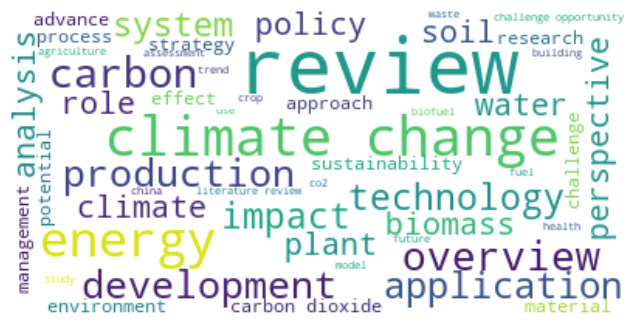

In [218]:
title = df['Title_Trim'].tolist()
title = " ".join(title)
drawWordcloud(title)

[2022년 논문제목 워드클라우드]

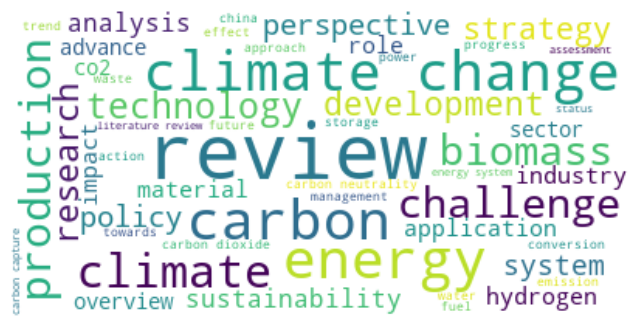

In [221]:
title = df[df['Year'] == 2022]['Title_Trim'].to_list()
title = " ".join(title)
drawWordcloud(title)

워드클라우드를 적용해 보니... 

climate change(기후변화), energy(에너지)와 같은 단어들이 가장 먼저 보이고, 특히 2022년에는 hydrogen(수소), strategy(전략)이라는 단어들이 먼저 눈에 띄네요. 

이번 분석 노트의 목표는 탄소중립을 위한 최신 기후기술 동향을 파악하는 것이므로 이러한 동향을 직관적으로 파악할 수 있는 시각화 기법을 적용해보고자 합니다.

## Step 4. 연도별 TF-IDF를 적용한 논문제목 키워드 시각화

TF-IDF는 Term Frequency Inverse Document Frequency의 약자로 정보검색 분야에서 키워드를 도출하기 위해 사용하는 알고리즘 중 하나입니다. 최근 논문제목 내 키워드를 뽑아 보기 위해서 연도별 논문제목을 문서로 생성하고, TF-IDF를 계산하였습니다.

In [154]:
# 연도별 단어 merge
gb = df.groupby('Year')

df_by_year = pd.DataFrame()

for x in gb.groups:
  #print(x)
  gb_temp = gb.get_group(x)
  temp_keyword = gb_temp['Title_Trim'].tolist()
  df_temp = pd.DataFrame({'group':x, 'titles': [" ".join(temp_keyword)]})
  df_by_year = df_by_year.append(df_temp)
df_by_year.reset_index(drop = True, inplace = True)
display(df_by_year)

,group,titles
0,2010,microalgae biodiesel production application re...
1,2011,era reanalysis configuration performance data ...
2,2012,metal framework biomedicine hydrogen storage m...
3,2013,chemistry application metal framework exfoliat...
4,2014,biochar sorbent management soil water review c...
5,2015,nature soil matter framework nature people app...
6,2016,advance transition metal phosphide nanomateria...
7,2017,theory experiment electrocatalysis insight mat...
8,2018,carbon capture storage way conversion carbon d...
9,2019,role hydrogen fuel cell energy system learning...


In [155]:
# 일별로 tf-idf를 계산하고, 그 결과를 이슈정도로 해석
vec_tfidf = TfidfVectorizer(lowercase=False)
X_tfidf = vec_tfidf.fit_transform(df_by_year['titles'].tolist())
df_tfidf = pd.DataFrame(X_tfidf.toarray(), index=df_by_year['group'].tolist(), columns=vec_tfidf.get_feature_names())    
df_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aba,abatement,abay,abc,abdel,abe,abies,abijata,ability,aboveground,...,zhejiang,ziegler,zimbabwe,zinc,zn,zoltan,zone,zone1,zoogeochemistry,zooplankton
2010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003674,0.000000,0.000000,0.008276
2011,0.000000,0.000000,0.000000,0.000000,0.008792,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008792,0.000000,0.000000,0.000000,0.000000,0.000000,0.002985,0.000000,0.000000,0.000000
2012,0.000000,0.003838,0.016919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.004862,0.000000,0.000000,0.008615,0.000000,0.000000,0.006469
2013,0.000000,0.003520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005346,0.000000,...,0.000000,0.000000,0.005934,0.000000,0.000000,0.000000,0.010536,0.000000,0.000000,0.000000
2014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007355,0.000000,0.000000,0.000000,...,0.000000,0.007355,0.000000,0.004227,0.005067,0.000000,0.002497,0.000000,0.000000,0.005624
2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004692,0.000000,...,0.000000,0.000000,0.000000,0.003914,0.004692,0.000000,0.004624,0.000000,0.000000,0.000000
2016,0.000000,0.003119,0.000000,0.000000,0.000000,0.000000,0.000000,0.006875,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007903,0.004737,0.000000,0.018671,0.000000,0.000000,0.000000
2017,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005042,0.007579,0.004543,0.000000,0.002238,0.000000,0.000000,0.000000
2018,0.006258,0.002839,0.000000,0.006258,0.000000,0.006258,0.000000,0.000000,0.004311,0.006258,...,0.000000,0.000000,0.000000,0.003597,0.000000,0.006258,0.002124,0.000000,0.006258,0.000000
2019,0.000000,0.002573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005776,0.005672,0.000000,0.000000


이렇게 각 연도별 단어에 대한 TF-IDF를 계산한 후, 이를 각 연도별로 내림차순하여, 해당연도에서 TF-IDF값이 큰 단어들을 선정하고, 

In [156]:
# 연도별 100위내 이슈가 된 단어들을 merge
issue_list = list()
num = 100

for i in range(len(df_tfidf.index)) :
  temp = df_tfidf.loc[df_tfidf.index[i]].sort_values(ascending=False)[0:num].index.tolist()
  temp = " ".join(temp)
  issue_list.append(temp)

issue_words = " ".join(issue_list).split(' ')
#print(issue_words)

count = Counter(issue_words)
words = dict(count.most_common())
print(words)

{'review': 13, 'energy': 13, 'climate': 13, 'change': 13, 'carbon': 13, 'challenge': 13, 'overview': 13, 'soil': 13, 'production': 13, 'technology': 13, 'water': 13, 'development': 13, 'biomass': 13, 'environment': 13, 'plant': 13, 'research': 13, 'impact': 13, 'opportunity': 13, 'application': 13, 'system': 13, 'policy': 13, 'state': 13, 'perspective': 13, 'study': 13, 'material': 13, 'ecosystem': 13, 'fuel': 13, 'analysis': 13, 'literature': 13, 'sustainability': 13, 'emission': 13, 'effect': 13, 'management': 13, 'use': 13, 'waste': 13, 'role': 13, 'assessment': 13, 'model': 13, 'co2': 13, 'approach': 13, 'process': 13, 'gas': 13, 'progress': 13, 'prospect': 13, 'strategy': 13, 'advance': 13, 'hydrogen': 12, 'building': 12, 'health': 12, 'cycle': 12, 'future': 12, 'food': 12, 'potential': 12, 'forest': 12, 'biofuels': 11, 'chemical': 11, 'response': 11, 'case': 11, 'life': 11, 'dioxide': 11, 'crop': 11, 'source': 11, 'conversion': 11, 'status': 10, 'interaction': 10, 'resource': 10,

해당 단어들의 TF-IDF값이 가장 컷던 연도를 구합니다.

In [157]:
issue_data = df_tfidf[list(words.keys())] 
issue_words_final = list(words.keys())

# 단어별로 가장 이슈가 되었던 날짜(tfidf가 max인 날짜)를 구하고, 내림차순으로 정렬
list_idxmax = list()
for i in range(len(issue_words_final)):
  temp = issue_data[issue_words_final[i]]
  list_idxmax.append(temp.idxmax())
pd_idxmax = pd.DataFrame({'word':issue_words_final, 'idx_max': list_idxmax})
pd_idxmax.sort_values(by=['idx_max','word'], inplace = True)
display(pd_idxmax)

,word,idx_max
133,biodiversity,2010
156,biosolids,2010
157,computer,2010
131,control,2010
153,copolymer,2010
...,...,...
68,storage,2022
44,strategy,2022
128,towards,2022
102,transition,2022


연도 x 단어 형태를 단어 x 연도 형태로 변환한 후, 연도별 키워드를 히트맵(heatmap)으로 표현합니다. 2022년에 상대적으로 논문에서 많이 사용된 단어로 capture(포집), decarbonization(탈탄소화), hydrogen(수소), neutrality(중립) 등임을 쉽게 확인할 수 있습니다. 

In [158]:
issue_data = df_tfidf[pd_idxmax['word']].transpose()
issue_data = issue_data.drop(labels = ['research', 'technology', 'study','review', 'overview']) # 일부 단어 제외처리

Text(0.5, 1.0, 'Transition of Title Keywords in Research Paper regarding Climate, Carbon, Neutral')

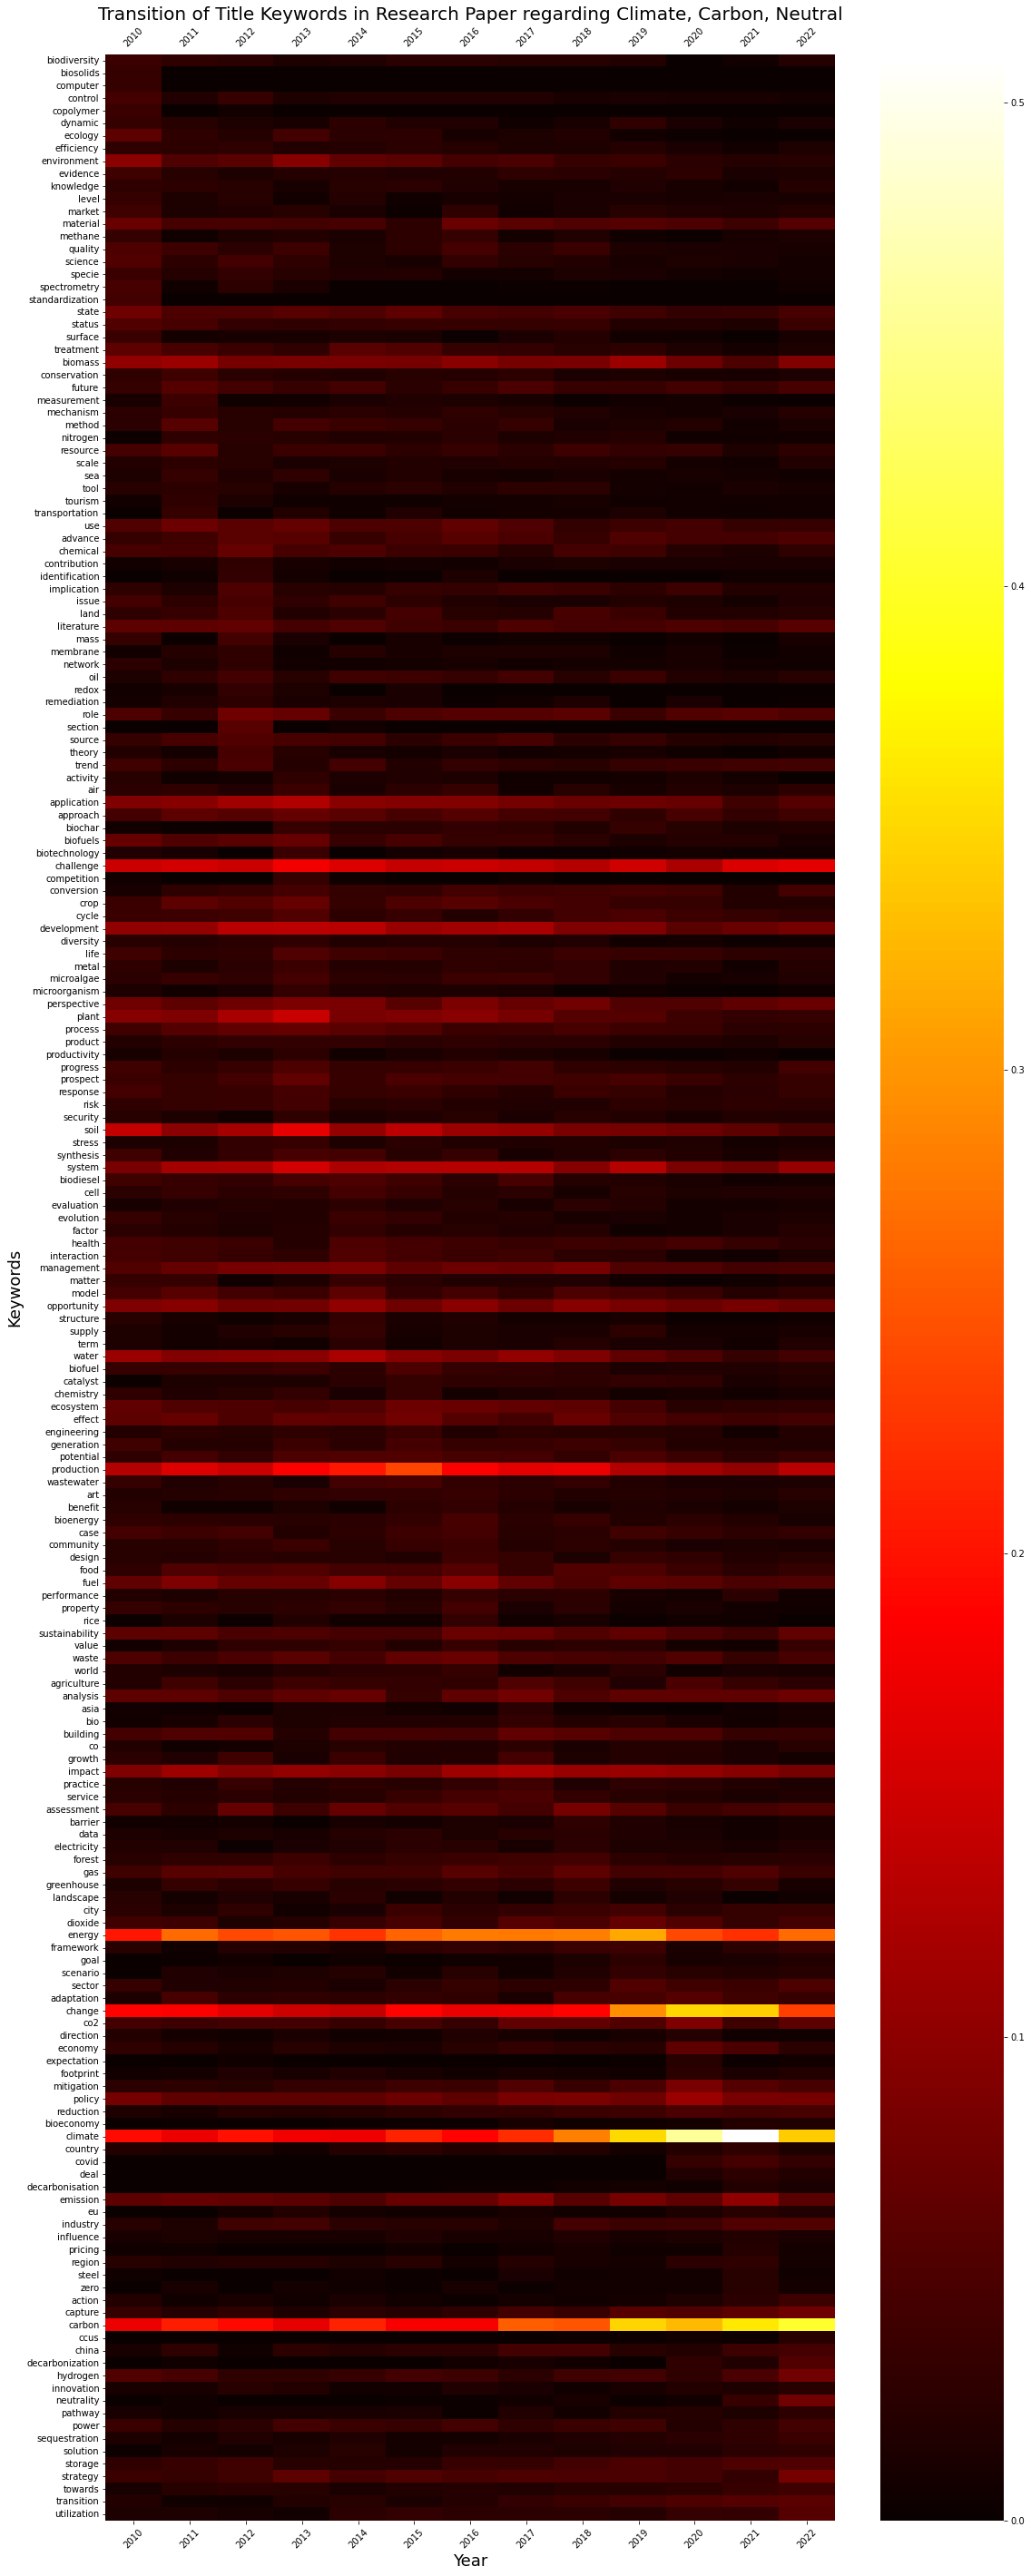

In [159]:
# 연도별 단어별 heatmap 시각화 
fig = plt.figure(figsize=(18,50))
ax = sns.heatmap(issue_data, cmap = 'hot', yticklabels=issue_data.index)
ax.tick_params(axis = 'x', labelbottom=True,labeltop=True, rotation = 45)

plt.xlabel("Year", size=18)
plt.ylabel("Keywords", size=18)
plt.title("Transition of Title Keywords in Research Paper regarding Climate, Carbon, Neutral", size=20)

## Step 5. 논문제목에 사용된 2021년 단어와 2022년 단어간 비교

두 개 그룹의 단어사용 비교하기 위한 시각화로 scattertext를 사용해보았습니다. scattertext는 두개 그룹에서 사용된 단어의 빈도를 각각 x축과 y축으로 표현하여 시각화합니다. 45도 각도에 놓여진 단어는 두개 그룹에서 각각 유사한 규모로 사용된 단어이며, x축 또는 y축으로 가까워질수록 해당 그룹에서 주로 많이 사용된 단어로 해석할 수 있습니다.

21년에 비해 22년에는 strategy(전략), carbon neutrality(탄소 중립성), decarbonization(탈탄소화), sustainability(지속가능성), hydrogen(수소), capture utility(포집효용) 등의 단어가 많이 사용되었음을 알 수 있습니다.

In [203]:
nlp = spacy.load('en_core_web_sm')
df_21_22 = df[df['Year'] >= 2021]
df_21_22['Category'] = df_21_22['Year'].astype(str)
df_21_22['Title_Trim2'] = df_21_22['Title_Trim'].apply(nlp)
df_21_22


,Title,Citations,Year,Source,Title_Trim,Category,Title_Trim2
0,The 2020 report of the Lancet Countdown on hea...,580,2021,https://www.sciencedirect.com/science/article/...,report countdown health climate change crisis,2021,"(report, countdown, health, climate, change, c..."
1,Getting the message right on nature-based solu...,145,2021,https://onlinelibrary.wiley.com/doi/abs/10.111...,message right nature solution change,2021,"(message, right, nature, solution, change)"
2,Integrating the evidence for a terrestrial car...,136,2021,https://nph.onlinelibrary.wiley.com/doi/abs/10...,evidence carbon sink co2,2021,"(evidence, carbon, sink, co2)"
3,Global trends in climate change litigation: 20...,132,2021,https://www.researchgate.net/profile/Joana-Set...,trend change litigation snapshot,2021,"(trend, change, litigation, snapshot)"
4,Hydrogen in energy transition: A review,129,2021,https://www.sciencedirect.com/science/article/...,hydrogen energy transition review,2021,"(hydrogen, energy, transition, review)"
...,...,...,...,...,...,...,...
993,"Use, calibration and verification of agroecolo...",0,2022,https://onlinelibrary.wiley.com/doi/abs/10.100...,use calibration verification model environment...,2022,"(use, calibration, verification, model, enviro..."
994,Plant Biomass as a Raw Material for Producing ...,0,2022,https://link.springer.com/article/10.1007/s105...,plant biomass material sysnthesis product,2022,"(plant, biomass, material, sysnthesis, product)"
995,Understanding Socio-Economic and Environmental...,0,2022,https://www.mdpi.com/1569484,impact agroforestry community,2022,"(impact, agroforestry, community)"
996,Life Cycle Assessment of a Thermal Sprayed Al2...,0,2022,https://link.springer.com/article/10.1007/s116...,life cycle assessment al2o3 heating coating pi...,2022,"(life, cycle, assessment, al2o3, heating, coat..."


In [204]:
st_df = st.CorpusFromParsedDocuments(df_21_22, category_col='Category', parsed_col='Title_Trim2').build()

In [222]:
html = produce_scattertext_explorer(st_df,
                                    category='2022',
                                    category_name='2022',
                                    not_category_name='2021',
                                    minimum_term_frequency=5,
                                    width_in_pixels=1000,
                                    max_snippets = 0,
                                    max_docs_per_category = 0,
                                    metadata=df_21_22['Title'])
open(path + 'scatter_text.html', 'wb').write(html.encode('utf-8'))

483459

In [223]:
f = open(path + 'scatter_text.html', 'r', encoding="utf-8")
html = f.read()
display(HTML(html))

## Step 6 : 연관단어 살펴보기

하나의 단어만으로는 어떠한 문맥에서 사용되었는지 정확히 파악하기 어렵습니다. 이를 파악하기 위해서는 앞뒤에 어떠한 단어와 같이 사용되었는지를 살펴보아야 합니다. 2022년에 특히 사용이 많아진 단어들과 함께 사용된 단어들이 어떤 단어들인지 살펴보았습니다.

In [210]:
# 연관단어 
def coocc_word(sentences, keyword, window = 1, num = 5):
  coocc = dict()
  rt_str = ""
  for sent in sentences:
    word_list = sent.split(' ')
    length = len(word_list)
    for i,word in enumerate(word_list):
      if word == keyword:
        for j in range(max(i-window,0), min(i+window+1,length)):
          if word_list[j] in coocc:
            coocc[word_list[j]] += 1
          else:
            coocc[word_list[j]] = 1
          #print(coocc)
  df_occ = pd.Series(coocc, name='occ').sort_values(ascending=False)
  return df_occ

def coocc_word_vis(df, category, keyword, num_of_result = 6):
  df_co = coocc_word(df[df['Category'] == category]['Title_Trim'].to_list(), keyword)[1:num_of_result]
  df_co.iplot(kind = 'bar', color = 'blue', title  = category + '년도 [' + keyword + '] 연관단어 Top 5', xTitle = '연관단어', yTitle = '등장횟수')

# for pandas iplot
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

decarbonization(탈탄소화)는 enenrgy(에너지), sector(분야), strategy(전략)과 함께 사용되었습니다.

In [211]:
configure_plotly_browser_state()
coocc_word_vis(df_21_22, '2022', 'decarbonization')

strategy(전략)은 mitigation(완화), adaptation(적응), decarbonization(탈탄소화)와 함께 사용되었습니다.

In [212]:
configure_plotly_browser_state()
coocc_word_vis(df_21_22, '2022', 'strategy')

sustainability(지속가능성)은 plastic(플라스틱), carbon(탄소), material(물질, 재료)과 함께 사용되었습니다.

In [213]:
configure_plotly_browser_state()
coocc_word_vis(df_21_22, '2022', 'sustainability')

hydrogen(수소)는 production(생산), storage(저장), economy(경제)와 함께 사용되었습니다.

In [214]:
configure_plotly_browser_state()
coocc_word_vis(df_21_22, '2022', 'hydrogen')

## Step 7. 마무리

간단히, 구글스콜라를 통해 수집한 논문제목들을 시각화해보았습니다. 앞서 제시한 시각화 기법들이 탄소중립을 위한 기후기술 트렌드 파악에 도움이 되기를 기대하며, 이만 시각화 노트를 마칩니다. 끝까지 봐주셔서 감사합니다.